Load csv into SQLite

In [1]:
import sqlite3
import pandas as pd

# Load dataset
df = pd.read_csv("logistics_data_extended.csv")

# Connect to SQLite database
conn = sqlite3.connect("logistics_db.sqlite")

# Load data into SQLite
df.to_sql("shipments", conn, if_exists="replace", index=False)

60

SQL Queries

In [2]:
def run_query(query):
    return pd.read_sql_query(query, conn)

Retrieve all shipments that are still "In Transit" or "Pending"

In [3]:
query = "SELECT * FROM shipments WHERE Status IN ('In Transit', 'Pending');"
run_query(query)


,Shipment_ID,Order_Date,Customer_ID,Customer_Type,Product,Quantity,Price_per_Unit,Warehouse,Destination,Shipping_Priority,Status,Carrier,Tracking_Number,Delivery_Date,Return_Status,Handling_Cost,Total_Cost,Delivery_Delay
0,1005,2024-01-05,2061,Corporate,Appliances,7,520.16,D,New York,Expedited,In Transit,UPS,7706024,2024-01-09,Exchange Requested,4.73,3641.12,4
1,1006,2024-01-06,2021,Wholesale,Toys,1,NaN,C,New York,Overnight,In Transit,USPS,1898320,2024-01-10,No Return,47.09,838.52,4
2,1009,2024-01-09,2075,Wholesale,Food,9,213.03,D,Denver,Standard,Pending,FedEx,4264908,2024-01-13,Returned,46.04,1917.27,4
3,1012,2024-01-12,2100,Wholesale,Clothing,6,232.41,A,Denver,Expedited,In Transit,FedEx,7197323,2024-01-16,No Return,28.03,1394.46,4
4,1013,2024-01-13,2024,Wholesale,Electronics,8,179.08,D,Los Angeles,Overnight,In Transit,DHL,4621581,2024-01-17,No Return,9.08,1432.64,4
5,1015,2024-01-15,2022,Retail,Books,5,519.05,B,Los Angeles,Overnight,Pending,UPS,6963135,2024-01-19,Returned,39.10,2595.25,4
6,1016,2024-01-16,2053,Corporate,Appliances,1,264.53,A,New York,Overnight,In Transit,None,9814131,2024-01-20,No Return,24.54,264.53,4
7,1017,2024-01-17,2002,Wholesale,Toys,19,996.27,B,Miami,Expedited,In Transit,USPS,4599865,2024-01-21,Returned,49.28,18929.13,4
8,1018,2024-01-18,2088,Wholesale,Clothing,10,965.59,A,Houston,Overnight,In Transit,UPS,6382287,2024-01-22,Returned,19.46,9655.90,4
9,1021,2024-01-21,2002,Wholesale,Furniture,9,192.76,D,New York,Expedited,In Transit,FedEx,4772811,2024-01-25,No Return,41.63,1734.84,4


Find total revenue per Customer_Type

In [4]:
query = """
SELECT Customer_Type, SUM(Total_Cost) AS Total_Revenue
FROM shipments
GROUP BY Customer_Type;
"""
run_query(query)

,Customer_Type,Total_Revenue
0,Corporate,86237.35
1,Retail,100777.33
2,Wholesale,128944.22


Find shipments that took more than 5 days for delivery

In [7]:
query = "SELECT * FROM shipments WHERE Delivery_Delay > 3;"
run_query(query)

,Shipment_ID,Order_Date,Customer_ID,Customer_Type,Product,Quantity,Price_per_Unit,Warehouse,Destination,Shipping_Priority,Status,Carrier,Tracking_Number,Delivery_Date,Return_Status,Handling_Cost,Total_Cost,Delivery_Delay
0,1001,2024-01-01,2052,Corporate,Food,6,351.92,A,Los Angeles,Standard,Canceled,FedEx,1675510,2024-01-05,Returned,21.15,2111.52,4
1,1002,2024-01-02,2093,Corporate,Furniture,12,100.70,A,Los Angeles,Overnight,Delivered,DHL,4741196,2024-01-06,No Return,30.54,1208.40,4
2,1003,2024-01-03,2015,Retail,Electronics,12,940.82,D,Los Angeles,Expedited,Canceled,USPS,7990102,2024-01-07,Exchange Requested,14.28,11289.84,4
3,1004,2024-01-04,2072,Corporate,Appliances,11,400.58,A,New York,Standard,Canceled,UPS,3734296,2024-01-08,No Return,7.53,4406.38,4
4,1005,2024-01-05,2061,Corporate,Appliances,7,520.16,D,New York,Expedited,In Transit,UPS,7706024,2024-01-09,Exchange Requested,4.73,3641.12,4
5,1006,2024-01-06,2021,Wholesale,Toys,1,NaN,C,New York,Overnight,In Transit,USPS,1898320,2024-01-10,No Return,47.09,838.52,4
6,1007,2024-01-07,2083,Retail,Books,1,677.31,D,Chicago,Overnight,Canceled,DHL,6781565,2024-01-11,Exchange Requested,21.42,677.31,4
7,1008,2024-01-08,2087,Wholesale,Clothing,13,736.54,C,Seattle,Overnight,Delivered,FedEx,3007635,2024-01-12,No Return,29.48,9575.02,4
8,1009,2024-01-09,2075,Wholesale,Food,9,213.03,D,Denver,Standard,Pending,FedEx,4264908,2024-01-13,Returned,46.04,1917.27,4
9,1010,2024-01-10,2075,Wholesale,Toys,3,543.74,A,Miami,Expedited,Canceled,UPS,5260538,2024-01-14,No Return,5.05,1631.22,4


Retrieve shipments along with customer names

In [8]:
# Assuming the dataset already includes Customer_ID, create a dummy customers table
customers_df = df[['Customer_ID']].drop_duplicates()
customers_df['Customer_Name'] = ['Customer_' + str(i) for i in range(len(customers_df))]  # Mock data
customers_df.to_sql("customers", conn, if_exists="replace", index=False)

query = """
SELECT s.*, c.Customer_Name
FROM shipments s
JOIN customers c ON s.Customer_ID = c.Customer_ID;
"""
run_query(query)

,Shipment_ID,Order_Date,Customer_ID,Customer_Type,Product,Quantity,Price_per_Unit,Warehouse,Destination,Shipping_Priority,Status,Carrier,Tracking_Number,Delivery_Date,Return_Status,Handling_Cost,Total_Cost,Delivery_Delay,Customer_Name
0,1001,2024-01-01,2052,Corporate,Food,6,351.92,A,Los Angeles,Standard,Canceled,FedEx,1675510,2024-01-05,Returned,21.15,2111.52,4,Customer_0
1,1002,2024-01-02,2093,Corporate,Furniture,12,100.70,A,Los Angeles,Overnight,Delivered,DHL,4741196,2024-01-06,No Return,30.54,1208.40,4,Customer_1
2,1003,2024-01-03,2015,Retail,Electronics,12,940.82,D,Los Angeles,Expedited,Canceled,USPS,7990102,2024-01-07,Exchange Requested,14.28,11289.84,4,Customer_2
3,1004,2024-01-04,2072,Corporate,Appliances,11,400.58,A,New York,Standard,Canceled,UPS,3734296,2024-01-08,No Return,7.53,4406.38,4,Customer_3
4,1005,2024-01-05,2061,Corporate,Appliances,7,520.16,D,New York,Expedited,In Transit,UPS,7706024,2024-01-09,Exchange Requested,4.73,3641.12,4,Customer_4
5,1006,2024-01-06,2021,Wholesale,Toys,1,NaN,C,New York,Overnight,In Transit,USPS,1898320,2024-01-10,No Return,47.09,838.52,4,Customer_5
6,1007,2024-01-07,2083,Retail,Books,1,677.31,D,Chicago,Overnight,Canceled,DHL,6781565,2024-01-11,Exchange Requested,21.42,677.31,4,Customer_6
7,1008,2024-01-08,2087,Wholesale,Clothing,13,736.54,C,Seattle,Overnight,Delivered,FedEx,3007635,2024-01-12,No Return,29.48,9575.02,4,Customer_7
8,1009,2024-01-09,2075,Wholesale,Food,9,213.03,D,Denver,Standard,Pending,FedEx,4264908,2024-01-13,Returned,46.04,1917.27,4,Customer_8
9,1010,2024-01-10,2075,Wholesale,Toys,3,543.74,A,Miami,Expedited,Canceled,UPS,5260538,2024-01-14,No Return,5.05,1631.22,4,Customer_8


Rank shipments by Total_Cost within each Warehouse

In [9]:
query = """
SELECT Shipment_ID, Warehouse, Total_Cost,
       RANK() OVER (PARTITION BY Warehouse ORDER BY Total_Cost DESC) AS Cost_Rank
FROM shipments;
"""
run_query(query)


,Shipment_ID,Warehouse,Total_Cost,Cost_Rank
0,1028,A,14478.39,1
1,1023,A,11931.62,2
2,1032,A,9907.26,3
3,1018,A,9655.90,4
4,1025,A,5999.28,5
5,1035,A,4869.00,6
6,1022,A,4802.16,7
7,1004,A,4406.38,8
8,1044,A,3109.81,9
9,1001,A,2111.52,10


Categorize delivery efficiency using CASE

In [10]:
query = """
SELECT Shipment_ID, Delivery_Delay,
       CASE 
           WHEN Delivery_Delay <= 3 THEN 'On Time'
           WHEN Delivery_Delay > 3 AND Delivery_Delay <= 7 THEN 'Delayed'
           ELSE 'Severely Delayed'
       END AS Delivery_Status
FROM shipments;
"""
run_query(query)


,Shipment_ID,Delivery_Delay,Delivery_Status
0,1001,4,Delayed
1,1002,4,Delayed
2,1003,4,Delayed
3,1004,4,Delayed
4,1005,4,Delayed
5,1006,4,Delayed
6,1007,4,Delayed
7,1008,4,Delayed
8,1009,4,Delayed
9,1010,4,Delayed


Data Cleaning & Computation

In [16]:
# Handle missing values
df['Carrier'].fillna(df['Carrier'].mode()[0], inplace=True)
df['Delivery_Date'].fillna(pd.to_datetime("today"), inplace=True)

# Compute new columns
df['Shipping_Cost'] = df['Shipping_Priority'].map({'Standard': 5, 'Expedited': 10, 'Overnight': 20}) * df['Quantity']
df['Profit'] = df['Total_Cost'] - df['Handling_Cost'] - df['Shipping_Cost']

# Summary statistics
df[['Total_Cost', 'Delivery_Delay', 'Profit']].describe()


,Total_Cost,Delivery_Delay,Profit
count,60.000000,60.0,60.000000
mean,5265.981667,4.0,5149.468833
std,4539.353917,0.0,4496.954238
min,91.920000,4.0,-26.170000
25%,1584.585000,4.0,1542.215000
50%,4066.815000,4.0,3972.845000
75%,8949.157500,4.0,8872.465000
max,18929.130000,4.0,18689.850000


Bar Chart: Total revenue per Destination

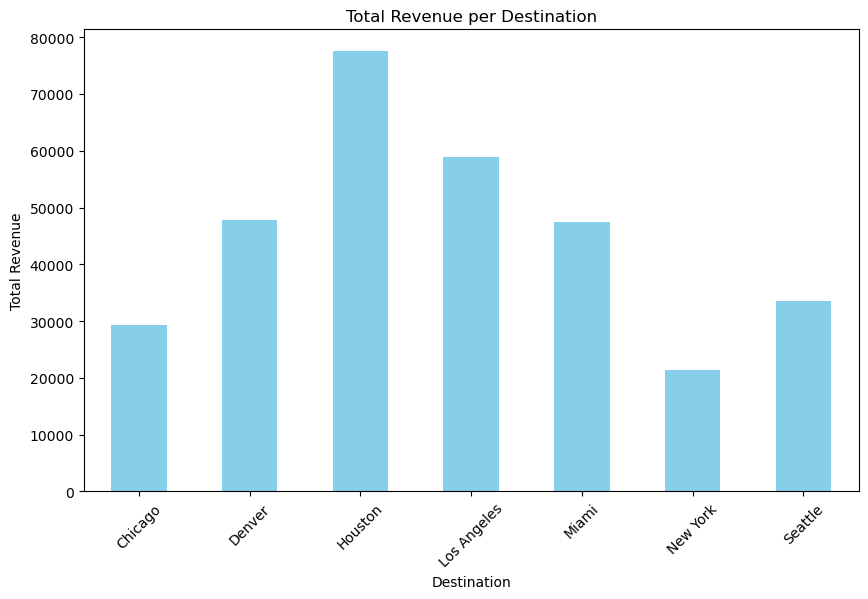

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df.groupby('Destination')['Total_Cost'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Revenue per Destination')
plt.xlabel('Destination')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


Pie Chart: Proportion of shipment Status values

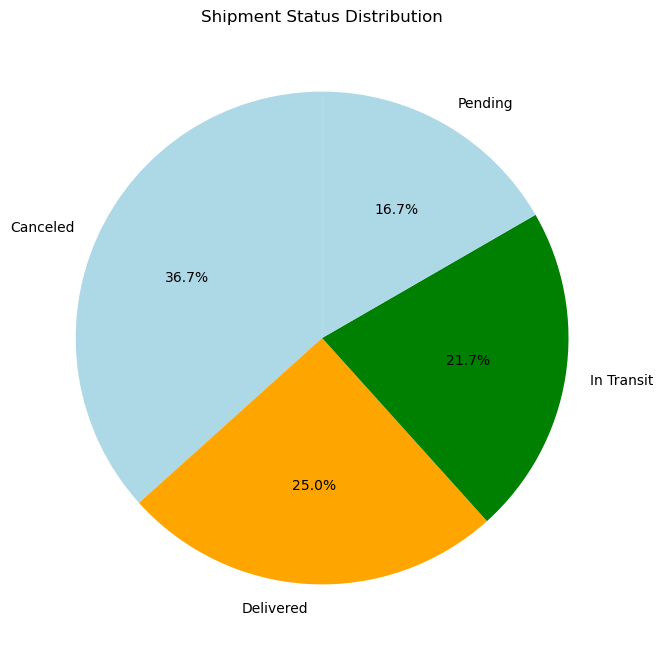

In [13]:
plt.figure(figsize=(8,8))
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'green'])
plt.title('Shipment Status Distribution')
plt.ylabel('')
plt.show()

Box Plot: Distribution of Delivery_Delay across Shipping_Priority categories

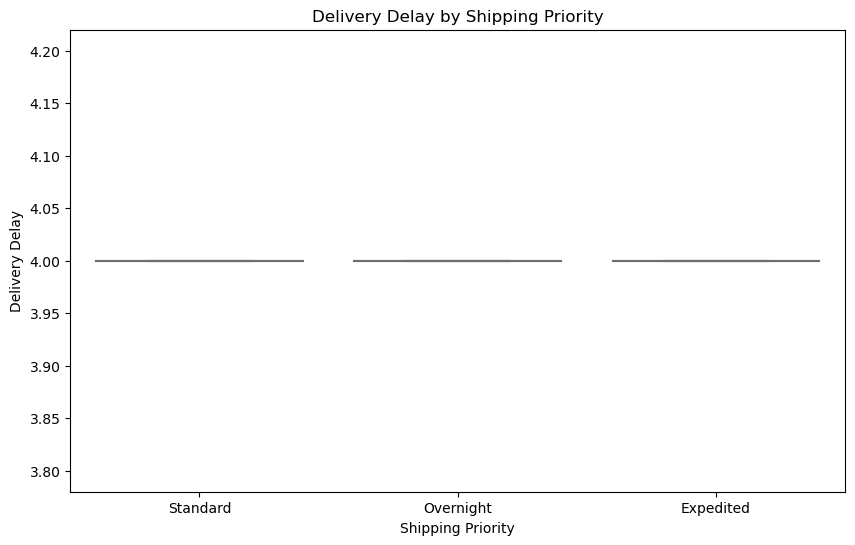

In [14]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x=df['Shipping_Priority'], y=df['Delivery_Delay'], palette='coolwarm')
plt.title('Delivery Delay by Shipping Priority')
plt.xlabel('Shipping Priority')
plt.ylabel('Delivery Delay')
plt.show()
